<a href="https://colab.research.google.com/github/AldanaPatino/Proyecto_integrador_2/blob/main/Educacion_Aregntina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: necesito que me armes un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Ciencias Sociales', 'Educación Física', 'Inglés', 'Física', 'Química', 'Biología', 'Arte', 'Música']

# Crear un DataFrame vacío
df = pd.DataFrame(columns=['Apellido', 'Nombre', 'nro_dni', 'materia escolar', 'nota 1er Trimestre', 'nota 2do Trimestre', 'nota 3er Trimestre', 'Faltas a clases'])

# Generar 100 filas de datos aleatorios
for i in range(100):
    apellido = ''.join(random.choice('abcdefghijklmnopqrstuvwxyz') for _ in range(8)).capitalize()
    nombre = ''.join(random.choice('abcdefghijklmnopqrstuvwxyz') for _ in range(6)).capitalize()
    dni = random.randint(10000000, 99999999)
    materia = random.choice(materias)
    nota1 = random.randint(1, 10)
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 20)

    df.loc[i] = [apellido, nombre, dni, materia, nota1, nota2, nota3, faltas]

# Mostrar el DataFrame
df

,Apellido,Nombre,nro_dni,materia escolar,nota 1er Trimestre,nota 2do Trimestre,nota 3er Trimestre,Faltas a clases
0,Mnxourlv,Upbujv,44428853,Historia,3,4,5,14
1,Hkbxigws,Gyroxa,56295081,Historia,8,5,2,4
2,Fbzzbrwv,Rumdtb,52201160,Biología,4,1,4,4
3,Mdiqlqfi,Ottqtu,35108836,Arte,6,8,1,5
4,Oxgyhxfg,Iurzbl,49873909,Física,2,2,2,8
...,...,...,...,...,...,...,...,...
95,Seexzaxv,Repzyt,88536925,Inglés,10,7,8,13
96,Runpiqgp,Fecmlh,66766432,Geografía,5,8,1,15
97,Qazmzkpq,Jzvtzw,79109712,Matemática,7,7,6,5
98,Rpyqcgiz,Pjfpfw,68337853,Biología,6,10,4,9


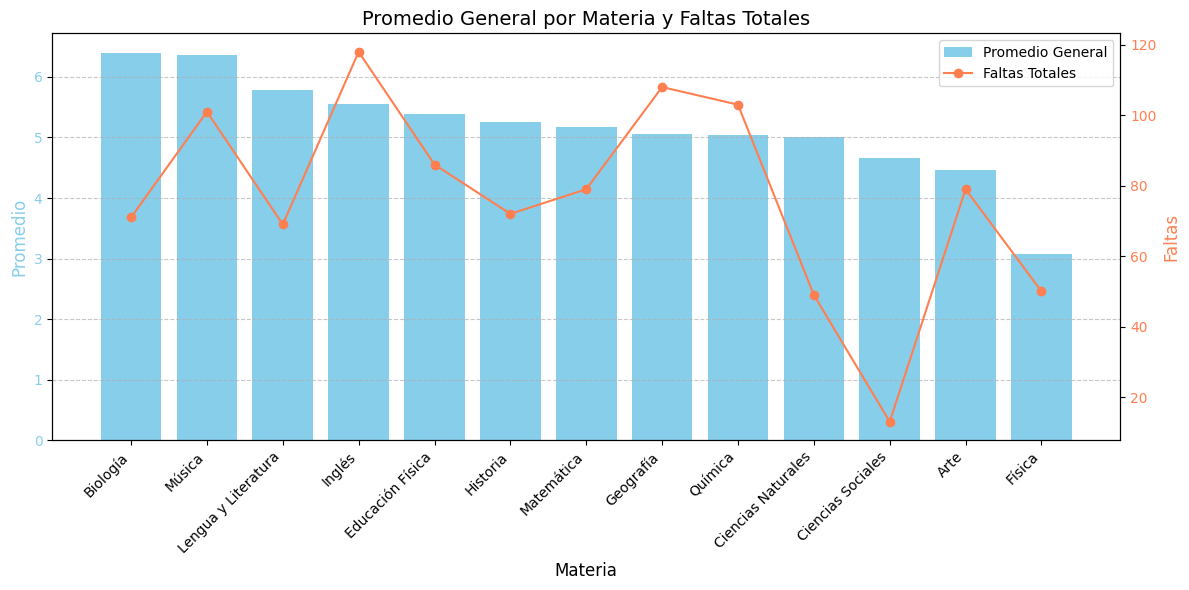

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# ... (previous code remains unchanged)

# Calculate the average grade for each subject
average_grades = df.groupby('materia escolar')[['nota 1er Trimestre', 'nota 2do Trimestre', 'nota 3er Trimestre']].mean().mean(axis=1)

# Calculate the total absences for each subject
total_absences = df.groupby('materia escolar')['Faltas a clases'].sum()

# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Promedio': average_grades, 'Faltas': total_absences})

# Sort the DataFrame by average grade in descending order
plot_df = plot_df.sort_values('Promedio', ascending=False)

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average grades
ax1.bar(plot_df.index, plot_df['Promedio'], color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia', fontsize=12)
ax1.set_ylabel('Promedio', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General por Materia y Faltas Totales', fontsize=14)
plt.xticks(rotation=45, ha='right')


# Create a second y-axis for absences
ax2 = ax1.twinx()
ax2.plot(plot_df.index, plot_df['Faltas'], color='coral', marker='o', label='Faltas Totales')
ax2.set_ylabel('Faltas', color='coral', fontsize=12)
ax2.tick_params(axis='y', labelcolor='coral')

# Add legends and grid lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)